 ЛАБОРАТОРНА РОБОТА 3

Тема:  Регресійний аналіз 

Мета: 
Ознайомитися з методами регресійного аналізу, навчитися працювати з реальними і штучно створеними наборами даних для класифікації, застосовувати моделі для класифікації даних та аналізувати результати.

Завдання:
1.Створити набір даних за допомогою DatasetGenerator.

2.Завантажити набір даних для класифікації з сайту Kaggle. Кожен студент має обрати унікальний набір даних.

3.(Опціонально для отримання відмінної оцінки) Згенерувати набір даних для класифікації, використовуючи стандартні можливості Python (наприклад, з допомогою бібліотек Numpy або random).

4.Провести моделювання для отриманих наборів даних з використанням регресійного аналізу.

5.Викласти результати на GitHub у власний репозиторій в основну гілку в папці Lab3.


In [7]:
# Завдання 1
import numpy as np
from sklearn.datasets import make_classification
import pandas as pd

# Генерація штучного набору даних
X, y = make_classification(n_samples=1000,  # кількість зразків
                            n_features=10,  # кількість ознак
                           n_classes=2,    # кількість класів
                           random_state=42)

# Перетворення в DataFrame для зручного аналізу
data = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 11)])
data['Target'] = y

# Перегляд перших рядків набору даних
print(data.head())


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.964799  -0.066449   0.986768  -0.358079   0.997266   1.181890   
1  -0.916511  -0.566395  -1.008614   0.831617  -1.176962   1.820544   
2  -0.109484  -0.432774  -0.457649   0.793818  -0.268646  -1.836360   
3   1.750412   2.023606   1.688159   0.006800  -1.607661   0.184741   
4  -0.224726  -0.711303  -0.220778   0.117124   1.536061   0.597538   

   Feature_7  Feature_8  Feature_9  Feature_10  Target  
0  -1.615679  -1.210161  -0.628077    1.227274       0  
1   1.752375  -0.984534   0.363896    0.209470       1  
2   1.239086  -0.246383  -1.058145   -0.297376       1  
3  -2.619427  -0.357445  -1.473127   -0.190039       0  
4   0.348645  -0.939156   0.175915    0.236224       1  


In [5]:
# Завдання 2
import pandas as pd  # Імпорт бібліотеки pandas

# Завдання 2: Завантаження даних з CSV
BeansData = pd.read_csv("data/Spotify_Most_Streamed_Songs.csv")
BeansData.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [8]:
# Завдання 3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Розділення даних на навчальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Створення моделі логістичної регресії
model = LogisticRegression()
model.fit(X_train, y_train)

# Прогнозування на тестовій вибірці
y_pred = model.predict(X_test)

# Оцінка моделі
print("Точність:", accuracy_score(y_test, y_pred))
print("Матриця плутанини:\n", confusion_matrix(y_test, y_pred))
print("Звіт класифікації:\n", classification_report(y_test, y_pred))


Точність: 0.8466666666666667
Матриця плутанини:
 [[118  17]
 [ 29 136]]
Звіт класифікації:
               precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



MSE: 51.92222963429377; MAE: 6.075504637244781; R2: 0.9712619995916598


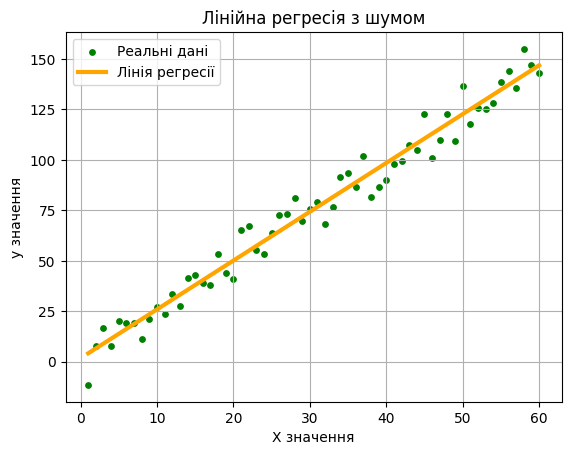

In [30]:
# Завдання 4
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Генерація даних
np.random.seed(100)
X = np.arange(1, 61, 1)  # Створюємо масив з 60 значень
y = 2.5 * X + np.random.normal(0, 8, 60)  # Лінійна залежність з шумом

# Створення DataFrame
df = pd.DataFrame({'X': X, 'y': y})

# Розділення на незалежну (X) та залежну (y) змінні
X = df[['X']]
y = df['y']

# Створення моделі лінійної регресії
model = LinearRegression()

# Навчання моделі
model.fit(X, y)

# Прогнозування
y_pred = model.predict(X)

# Оцінка моделі
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse}; MAE: {mae}; R2: {r2}")

# Візуалізація результатів
plt.scatter(X, y, color='green', label='Реальні дані', s=15)  # колір та розмір точок
plt.plot(X, y_pred, color='orange', linewidth=3, label='Лінія регресії')  # колір та товщину лінії
plt.xlabel('X значення')
plt.ylabel('y значення')
plt.title('Лінійна регресія з шумом')
plt.legend()
plt.grid(True)  # Додаємо сітку на графік
plt.show()
